##### Análise de Dados - Obesidade

In [68]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = pd.read_csv('data/obesidade_traduzido.csv')
df_num = pd.read_csv('data/obesidade_encoded.csv')

In [37]:
df.head()

,Idade,Genero,Altura,Peso,Freq_Alcool,Freq_Densidade_Calorica,Freq_Vegetais,Freq_Refeicoes,Monitoramento_Calorias_Diarias,Fumante,Agua_Diaria,Historico_Familiar,Atividade_Fisica,Freq_Tecnologia,Alimento_Entre_Refeicoes,Meio_Transporte,Nivel_Obesidade
0,21.0,Feminino,1.62,64.0,Negativo,Nao,2.0,3.0,Nao,Nao,2.0,Sim,0.0,1.0,Ocasionalmente,Transporte_Publico,Peso_Normal
1,21.0,Feminino,1.52,56.0,Ocasionalmente,Nao,3.0,3.0,Sim,Sim,3.0,Sim,3.0,0.0,Ocasionalmente,Transporte_Publico,Peso_Normal
2,23.0,Masculino,1.80,77.0,Frequentemente,Nao,2.0,3.0,Nao,Nao,2.0,Sim,2.0,1.0,Ocasionalmente,Transporte_Publico,Peso_Normal
3,27.0,Masculino,1.80,87.0,Frequentemente,Nao,3.0,3.0,Nao,Nao,2.0,Nao,2.0,0.0,Ocasionalmente,Caminhada,Sobrepeso_I
4,22.0,Masculino,1.78,89.8,Ocasionalmente,Nao,2.0,1.0,Nao,Nao,2.0,Nao,0.0,0.0,Ocasionalmente,Transporte_Publico,Sobrepeso_II


In [38]:
pd.DataFrame(df.isnull().sum()).T.style.background_gradient(cmap='coolwarm')

,Idade,Genero,Altura,Peso,Freq_Alcool,Freq_Densidade_Calorica,Freq_Vegetais,Freq_Refeicoes,Monitoramento_Calorias_Diarias,Fumante,Agua_Diaria,Historico_Familiar,Atividade_Fisica,Freq_Tecnologia,Alimento_Entre_Refeicoes,Meio_Transporte,Nivel_Obesidade
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df.describe(percentiles=[0, .25, .50, .75]).T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,0%,25%,50%,75%,max
Idade,2111.000000,24.312600,6.345968,14.000000,14.000000,19.947192,22.777890,26.000000,61.000000
Altura,2111.000000,1.701677,0.093305,1.450000,1.450000,1.630000,1.700499,1.768464,1.980000
Peso,2111.000000,86.586058,26.191172,39.000000,39.000000,65.473343,83.000000,107.430682,173.000000
Freq_Vegetais,2111.000000,2.419043,0.533927,1.000000,1.000000,2.000000,2.385502,3.000000,3.000000
Freq_Refeicoes,2111.000000,2.685628,0.778039,1.000000,1.000000,2.658738,3.000000,3.000000,4.000000
Agua_Diaria,2111.000000,2.008011,0.612953,1.000000,1.000000,1.584812,2.000000,2.477420,3.000000
Atividade_Fisica,2111.000000,1.010298,0.850592,0.000000,0.000000,0.124505,1.000000,1.666678,3.000000
Freq_Tecnologia,2111.000000,0.657866,0.608927,0.000000,0.000000,0.000000,0.625350,1.000000,2.000000


In [40]:
colunas_cat = df.select_dtypes(include=['object']).columns.to_list()
for col in df[colunas_cat]:
    print(f"\nColuna: {col}\n{df[col].value_counts()}")


Coluna: Genero
Genero
Masculino    1068
Feminino     1043
Name: count, dtype: int64

Coluna: Freq_Alcool
Freq_Alcool
Ocasionalmente    1401
Negativo           639
Frequentemente      70
Sempre               1
Name: count, dtype: int64

Coluna: Freq_Densidade_Calorica
Freq_Densidade_Calorica
Sim    1866
Nao     245
Name: count, dtype: int64

Coluna: Monitoramento_Calorias_Diarias
Monitoramento_Calorias_Diarias
Nao    2015
Sim      96
Name: count, dtype: int64

Coluna: Fumante
Fumante
Nao    2067
Sim      44
Name: count, dtype: int64

Coluna: Historico_Familiar
Historico_Familiar
Sim    1726
Nao     385
Name: count, dtype: int64

Coluna: Alimento_Entre_Refeicoes
Alimento_Entre_Refeicoes
Ocasionalmente    1765
Frequentemente     242
Sempre              53
Negativo            51
Name: count, dtype: int64

Coluna: Meio_Transporte
Meio_Transporte
Transporte_Publico    1580
Automovel              457
Caminhada               56
Moto                    11
Bicicleta                7
Name: count

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Idade                           2111 non-null   float64
 1   Genero                          2111 non-null   object 
 2   Altura                          2111 non-null   float64
 3   Peso                            2111 non-null   float64
 4   Freq_Alcool                     2111 non-null   object 
 5   Freq_Densidade_Calorica         2111 non-null   object 
 6   Freq_Vegetais                   2111 non-null   float64
 7   Freq_Refeicoes                  2111 non-null   float64
 8   Monitoramento_Calorias_Diarias  2111 non-null   object 
 9   Fumante                         2111 non-null   object 
 10  Agua_Diaria                     2111 non-null   float64
 11  Historico_Familiar              2111 non-null   object 
 12  Atividade_Fisica                21

##### Correlações

In [56]:
plt.style.use('dark_background')

In [42]:
corr_matrix = df_num.corr()

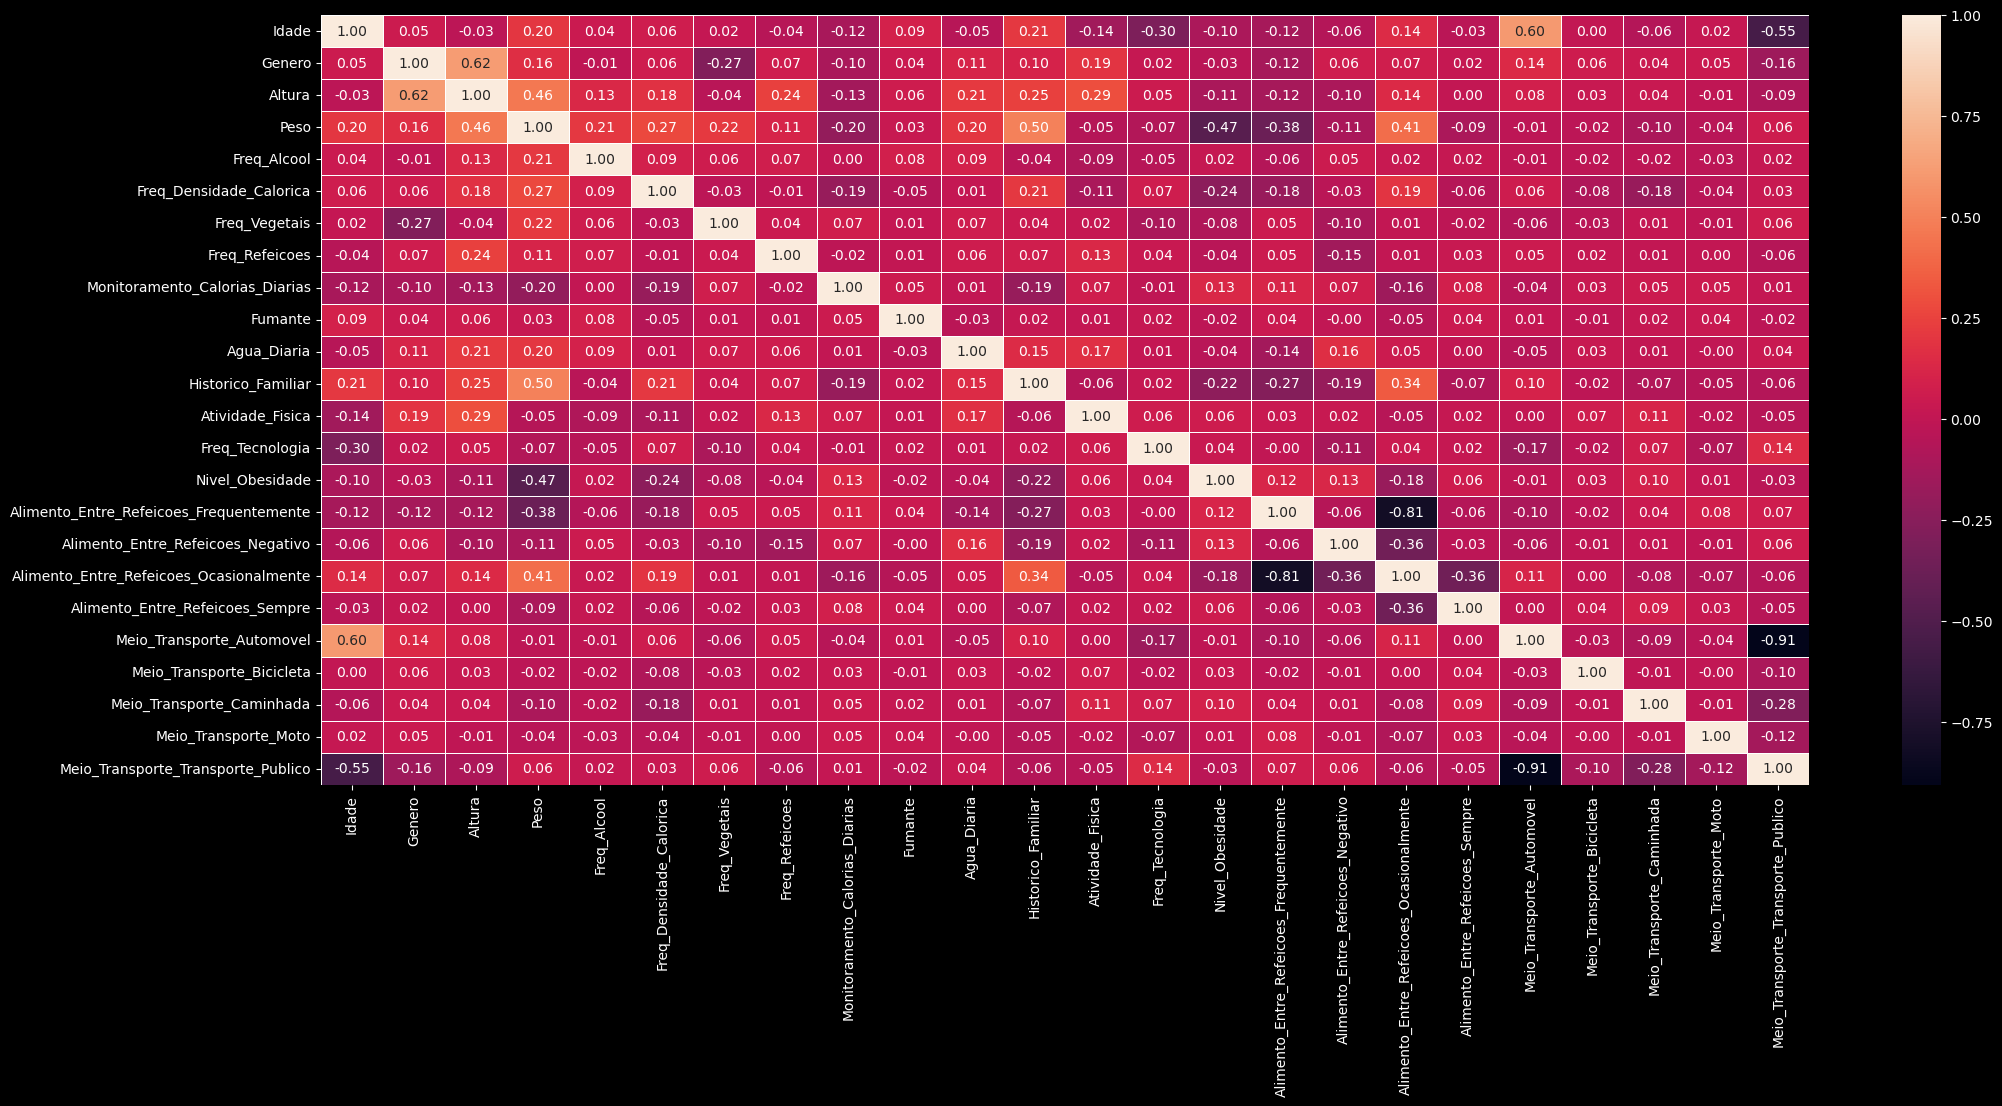

In [57]:
plt.figure(figsize=(24, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt='.2f')
plt.show()

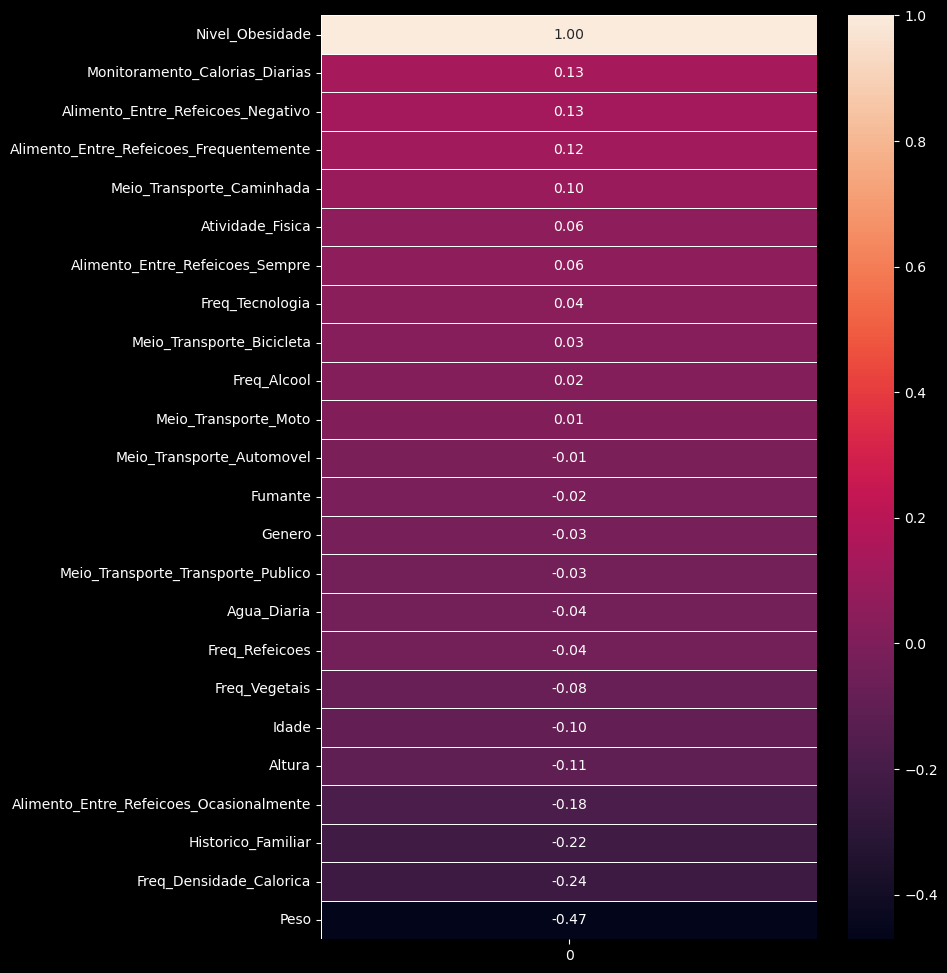

In [70]:
corr = df_num.corrwith(df_num['Nivel_Obesidade']).sort_values(ascending=False).to_frame()

plt.figure(figsize=(8, 12))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f')
plt.show()

##### Distribuição das Colunas Numéricas e Categóricas

In [50]:
def grafico_num(dataframe, variavel):
    fig = px.box(dataframe, y=variavel, color='Nivel_Obesidade', color_discrete_sequence=px.colors.qualitative.Bold, template='plotly_dark')
    fig.show()

In [51]:
num_col = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

for coluna in num_col:
    grafico_num(df, coluna)

In [52]:
def grafico_cat(df, variavel):
    fig = px.histogram(df, x=variavel, color='Nivel_Obesidade', text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel, barmode='group', template='plotly_dark')
    fig.show()

In [53]:
cat_col = df.select_dtypes(include=['object']).columns.to_list()
cat_col.pop()

for coluna in cat_col:
    grafico_cat(df, coluna)

##### Insights

###### Como a altura das pessoas se relaciona com o peso, considerando diferentes níveis de obesidade?

In [85]:
fig = px.scatter(df, x='Peso', y='Altura', color='Nivel_Obesidade', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

###### Existe uma diferença na frequência de consumo de vegetais entre diferentes gêneros, considerando os níveis de obesidade?

In [91]:
fig = px.box(df, x='Genero', y='Freq_Vegetais', color='Nivel_Obesidade', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

###### Existe uma relação entre ser fumante e o nível de atividade física, considerando os níveis de obesidade?

In [119]:
fig = px.histogram(df, x='Fumante', y='Atividade_Fisica', color='Nivel_Obesidade', template='plotly_dark', text_auto=True, color_discrete_sequence=px.colors.qualitative.G10,
                   barmode='group', histfunc='avg')
fig.show()

###### Como a quantidade de água consumida diariamente se relaciona com a frequência das refeições

In [114]:
fig = px.scatter(df, x='Agua_Diaria', y='Freq_Refeicoes', color='Nivel_Obesidade', color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark')
fig.show()

###### Qual é a relação entre a frequência de uso de tecnologia e o nível de atividade física?

In [115]:
fig = px.scatter(df, x='Freq_Tecnologia', y='Atividade_Fisica', color='Nivel_Obesidade', color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark')
fig.show()

###### Como o hábito de consumir alimentos entre refeições se relaciona com a Idade?

In [118]:
fig = px.histogram(df, x='Meio_Transporte', y='Idade', color='Nivel_Obesidade', template='plotly_dark', text_auto=True, 
                   color_discrete_sequence=px.colors.qualitative.G10, barmode='group', histfunc='avg')
fig.show()

###### Qual é a relação entre idade e a quantidade de água consumida diariamente?

In [122]:
fig = px.scatter(df, x='Idade', y='Agua_Diaria', color='Nivel_Obesidade', color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark')
fig.show()